# PRACTICA 4

## Audio Prep

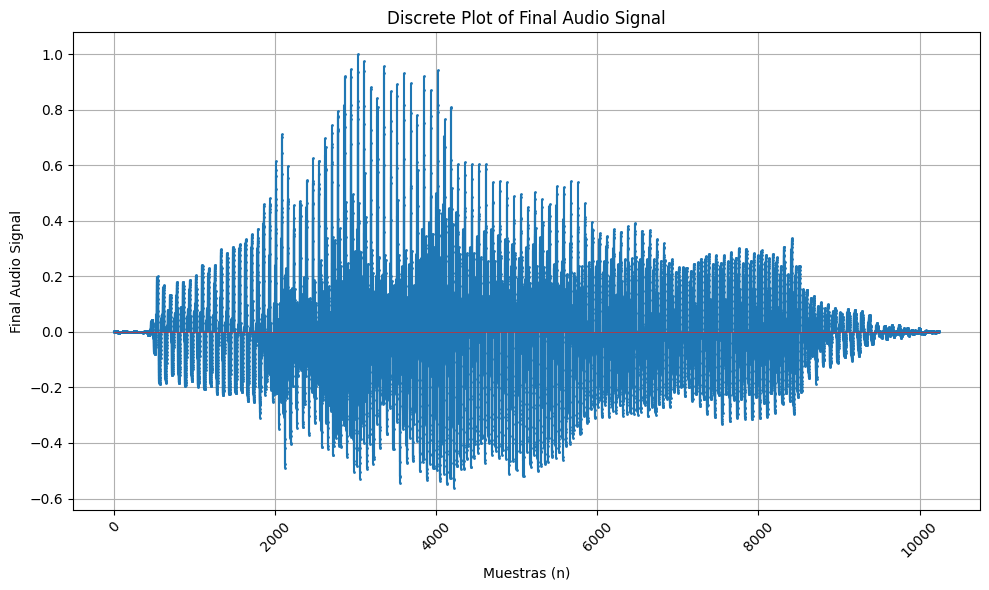

In [1]:
import sys
import numpy as np
import sounddevice as sd
import scipy.signal as signal
import librosa

sys.path.append("/Users/carlosedm10/projects/college/TDS")

from utils import discrete_time_plot
from audio_feature_extractor import (
    mfcc,
    spectral_flux,
    spectral_centroid,
    spectral_kurtosis,
    spectral_rolloff,
    spectral_skewness,
    spectral_spread,
    calculate_audio_features,
)

from scipy.io import wavfile

# from scipy.signal import resample, spectrogram
from matplotlib import pyplot as plt


# Path to audio
audio_path = "/Users/carlosedm10/projects/college/TDS/P4/nine.wav"

# Read the audio file
freq, audio_data = wavfile.read(audio_path)

# Now we will make the audio Mono
if audio_data.ndim > 1:
    audio_data = audio_data.mean(axis=1)
    print("Audio is stereo, converting to mono")

audio_data = audio_data / 2**15

# Normalization (if your audio data is in integers and needs to be normalized)
audio_data = audio_data / np.max(np.abs(audio_data))


# Changing the audio frequency to 16kHz if necesary
# Target frequency
target_freq = 16000

if freq != 16000:
    print(f"Resampling audio from {freq}Hz to {target_freq}Hz")
    # Calculate new length of the sample
    new_length = round(len(audio_data) * target_freq / freq)

    # Resample the audio to the target frequency
    audio_data = signal.resample(audio_data, new_length)

audio_data = librosa.effects.trim(audio_data, top_db=20)[0]

# Plot the voice signal
discrete_time_plot(
    np.arange(0, len(audio_data)), audio_data, variable_name="Final Audio Signal"
)
freq = target_freq
hop_length = int(0.032 * freq / 2)

# Exercise 1
## Calculate the MFCC

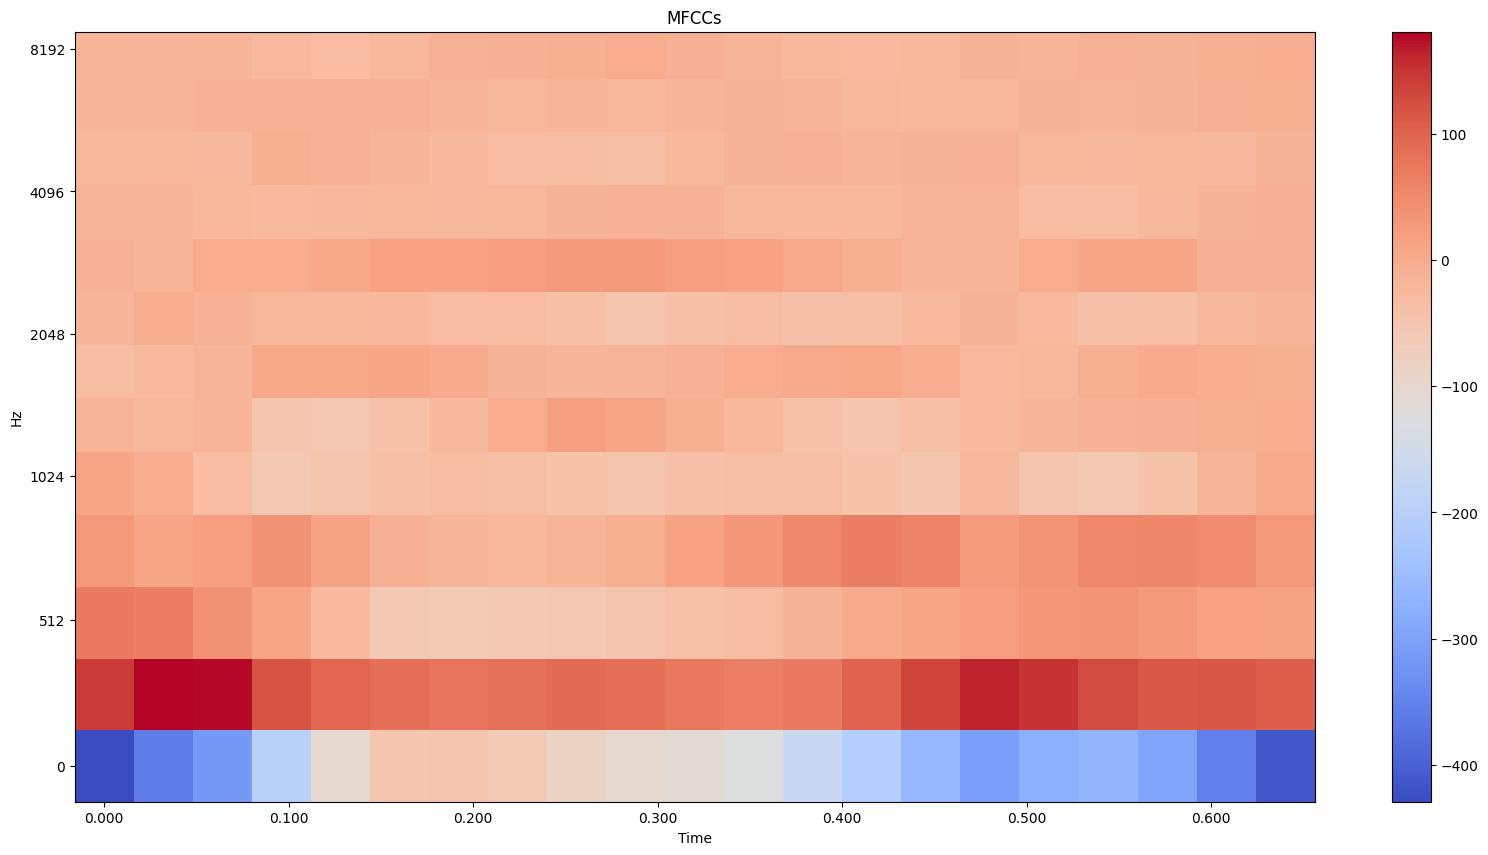

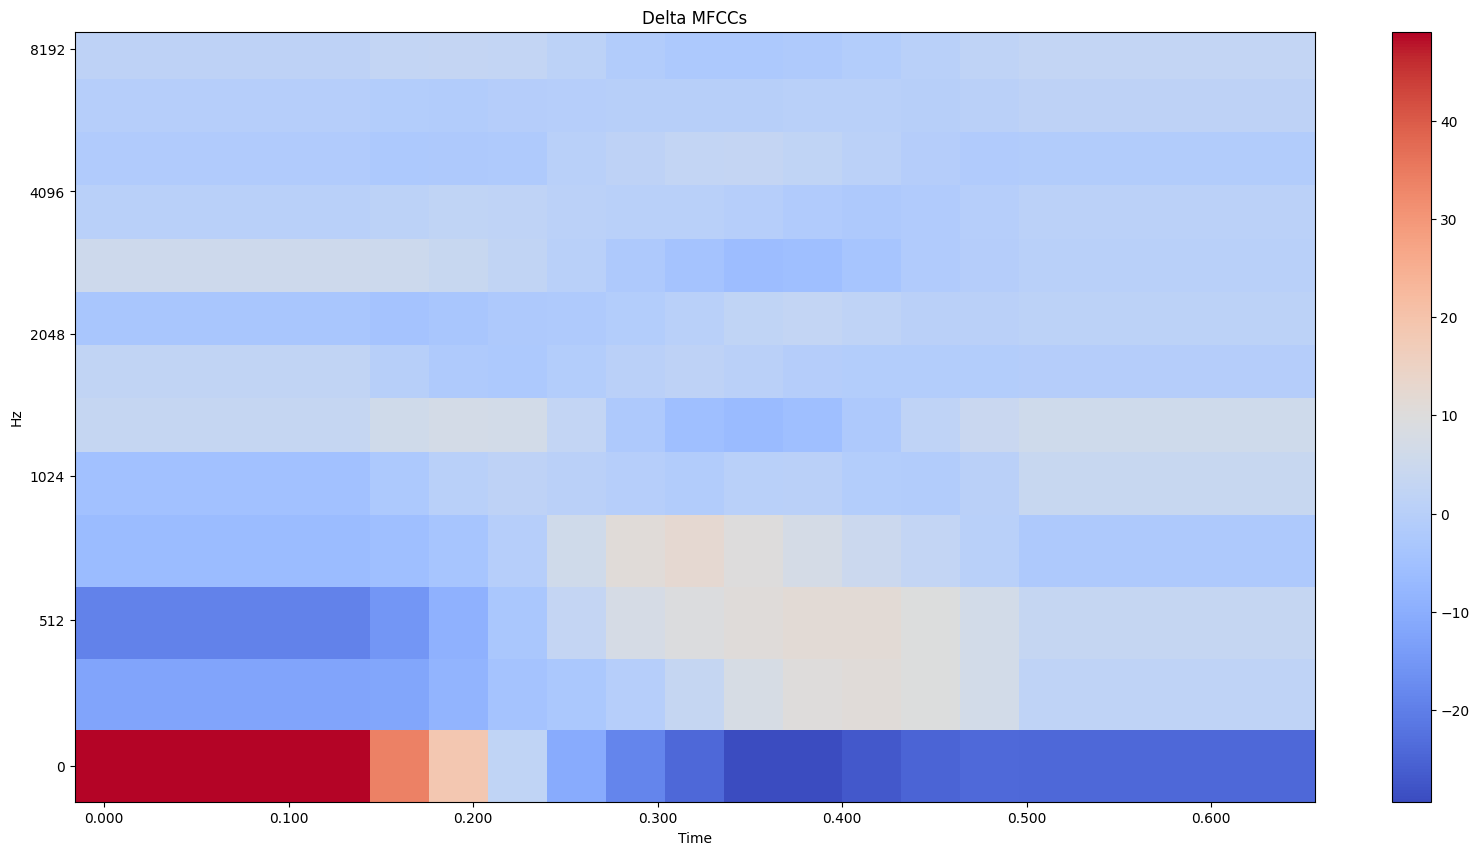

(array([[-4.29383575e+02, -3.59345022e+02, -3.15296429e+02,
         -1.98628441e+02, -1.01927885e+02, -5.12882148e+01,
         -4.59358906e+01, -6.35051570e+01, -8.72499692e+01,
         -1.02153633e+02, -1.08792073e+02, -1.25942034e+02,
         -1.68260472e+02, -2.06161283e+02, -2.58050641e+02,
         -3.07490909e+02, -2.78184824e+02, -2.65918329e+02,
         -2.96905157e+02, -3.53344163e+02, -4.14904746e+02],
        [ 1.45142987e+02,  1.81154608e+02,  1.76651303e+02,
          1.17529087e+02,  9.54657600e+01,  8.67396964e+01,
          8.03305942e+01,  8.34625773e+01,  9.13657207e+01,
          8.76480404e+01,  7.19152363e+01,  6.46016482e+01,
          7.16246466e+01,  1.00251294e+02,  1.33846523e+02,
          1.63405488e+02,  1.51247592e+02,  1.27881400e+02,
          1.13554284e+02,  1.15441290e+02,  1.05310697e+02],
        [ 6.95797772e+01,  6.75320760e+01,  4.01384631e+01,
          1.02245915e+01, -2.69145788e+01, -5.75178078e+01,
         -6.30002321e+01, -5.77474641e

In [2]:
mfcc(audio_data, freq, n_mfcc=13, hop_length=512)

# Exercise 2
## Calculate the Spectral flux

array([ 2859.39215679,  3262.2428959 ,  7458.95674098,  7522.35134118,
       26233.41050643, 23548.48093268, 28662.38923873, 26340.86999886,
       23949.97449761, 19806.1490452 ,  6250.8331612 ,  5520.26001108,
        9262.02665907,  9701.37048616,  4887.58642716,   677.85335224,
        5829.1556264 ,  5809.37486172,  1032.97661653,   241.81969407])

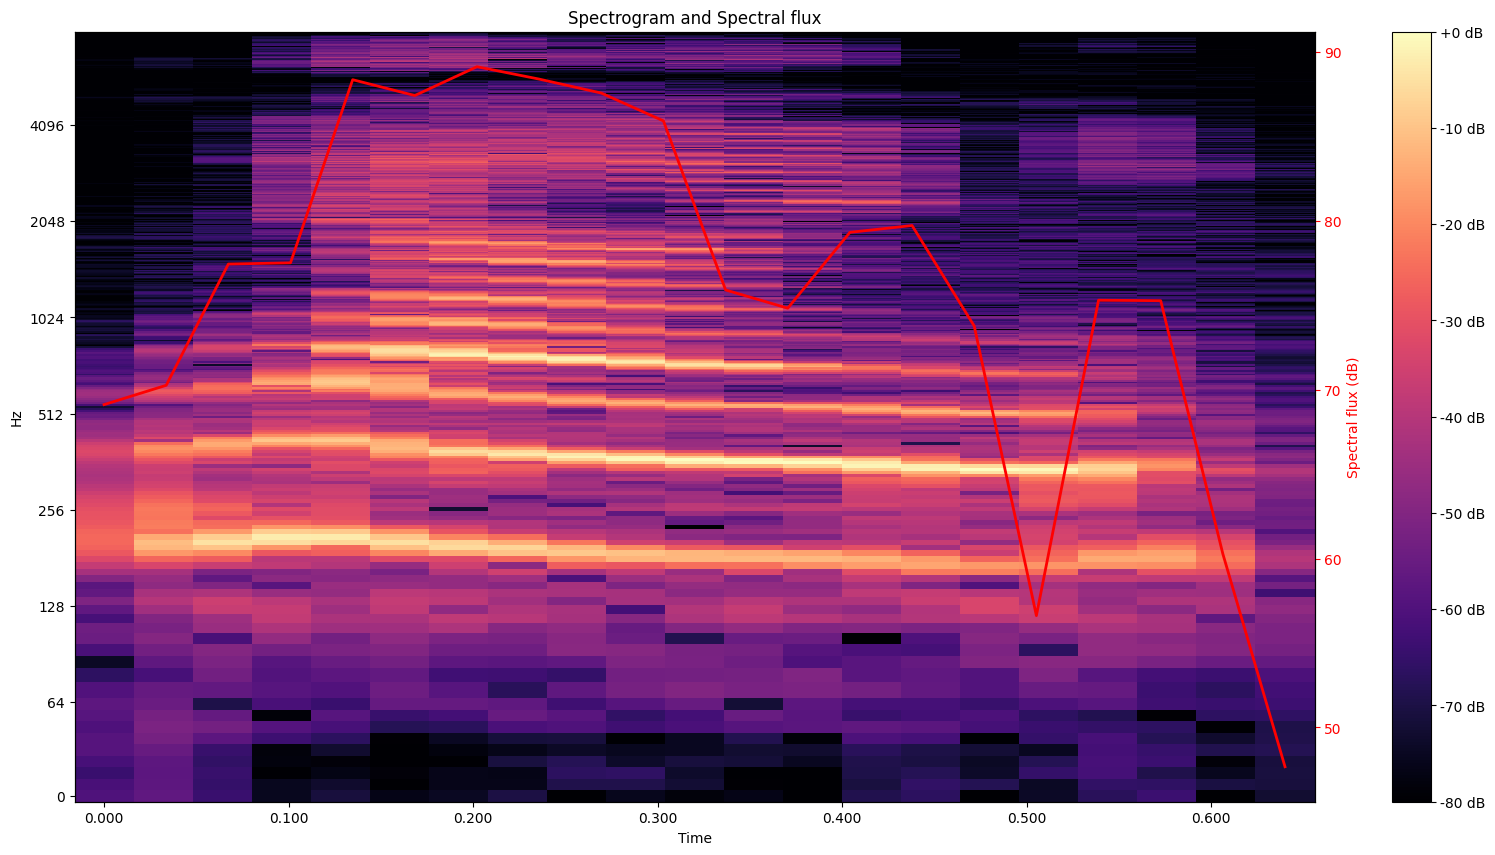

In [3]:
spectral_flux(audio_data, freq)

# Calculate the Spectral Centroid

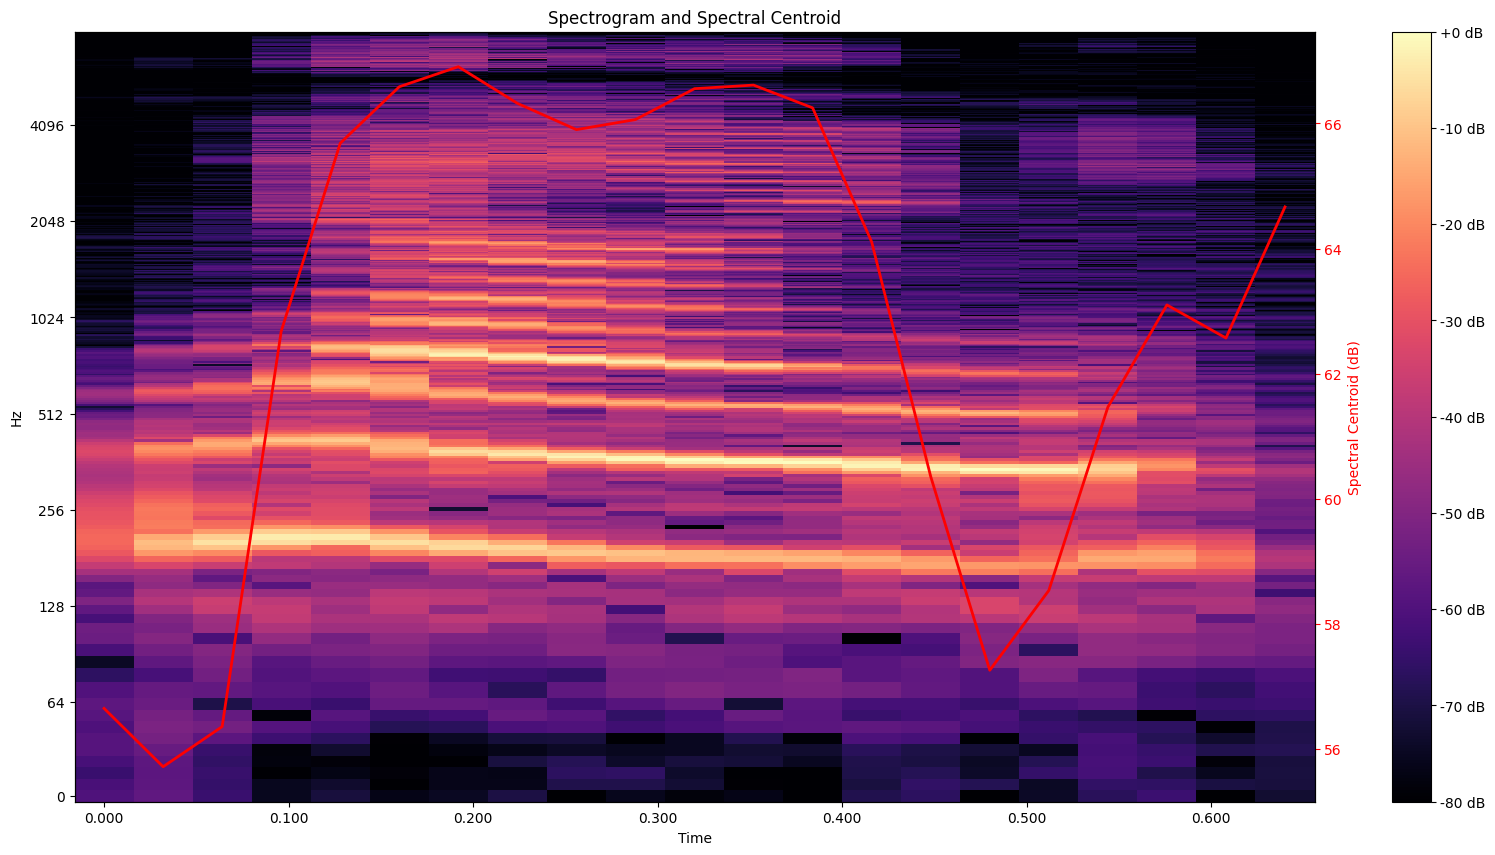

array([ 680.09050623,  610.84731918,  657.63617631, 1361.06332991,
       1923.98273962, 2134.42747662, 2214.61080903, 2070.30050014,
       1972.49914949, 2009.46022981, 2126.91831786, 2140.93673923,
       2053.20144809, 1604.2697505 , 1041.81708135,  729.4890689 ,
        844.88675494, 1183.75503566, 1428.70328577, 1344.31513931,
       1711.13115539])

In [4]:
spectral_centroid(audio_data, freq)

# Extra feautures:
## Spectral Kurtosis

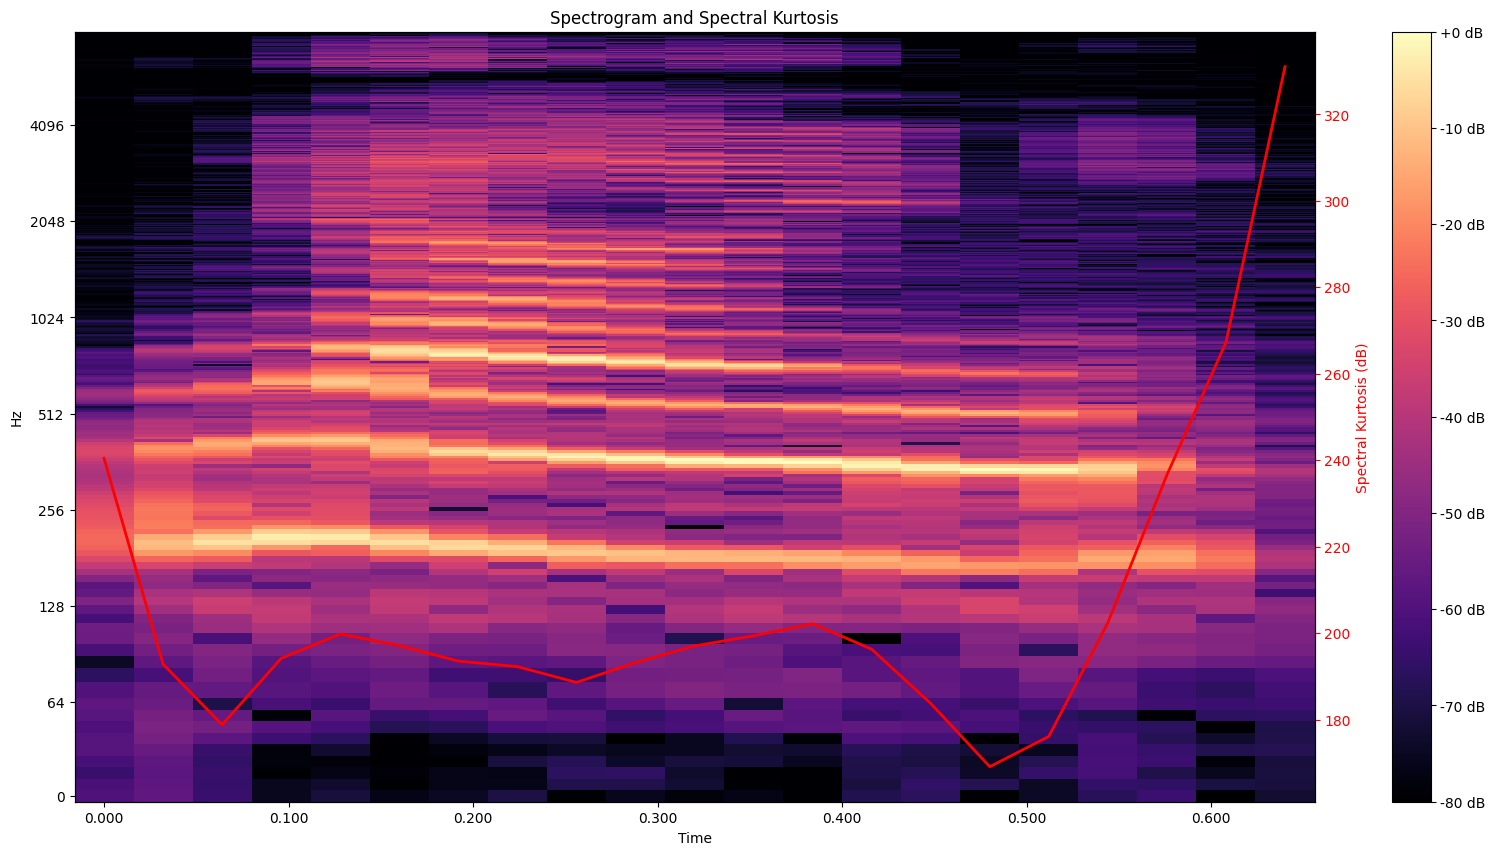

array([1.05463393e+12, 4.38739588e+09, 8.73912058e+08, 5.12522132e+09,
       9.78098328e+09, 7.19309537e+09, 4.75534493e+09, 4.10859236e+09,
       2.69874234e+09, 4.57421001e+09, 7.13181243e+09, 9.32094294e+09,
       1.28709322e+10, 6.52980641e+09, 1.54225593e+09, 2.85773446e+08,
       6.40292771e+08, 1.32431458e+10, 6.75582073e+11, 2.31118498e+13,
       3.55967065e+16])

In [5]:
spectral_kurtosis(audio_data, freq)

## Spectral Rolloffpoint

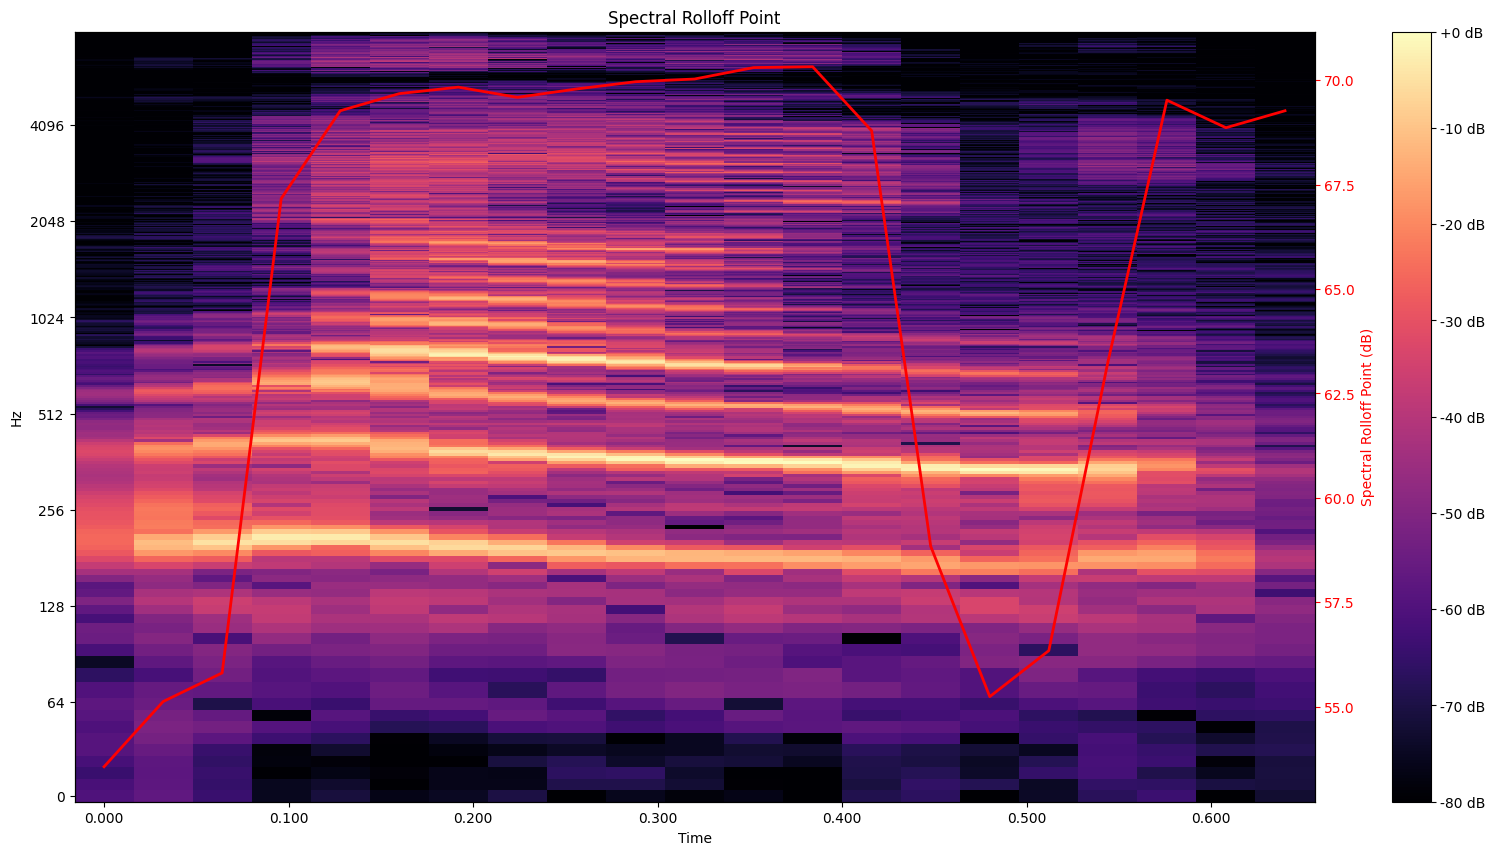

array([ 476.5625,  570.3125,  617.1875, 2281.25  , 2906.25  , 3046.875 ,
       3101.5625, 3015.625 , 3085.9375, 3148.4375, 3171.875 , 3273.4375,
       3281.25  , 2750.    ,  875.    ,  578.125 ,  656.25  , 1453.125 ,
       2992.1875, 2773.4375, 2906.25  ])

In [6]:
spectral_rolloff(audio_data, freq)

## Spectral Skewness

/Users/carlosedm10/projects/college/TDS/audio_feature_extractor.py:317: RuntimeWarning: divide by zero encountered in log10
  20 * np.log10(normalized_skewness),


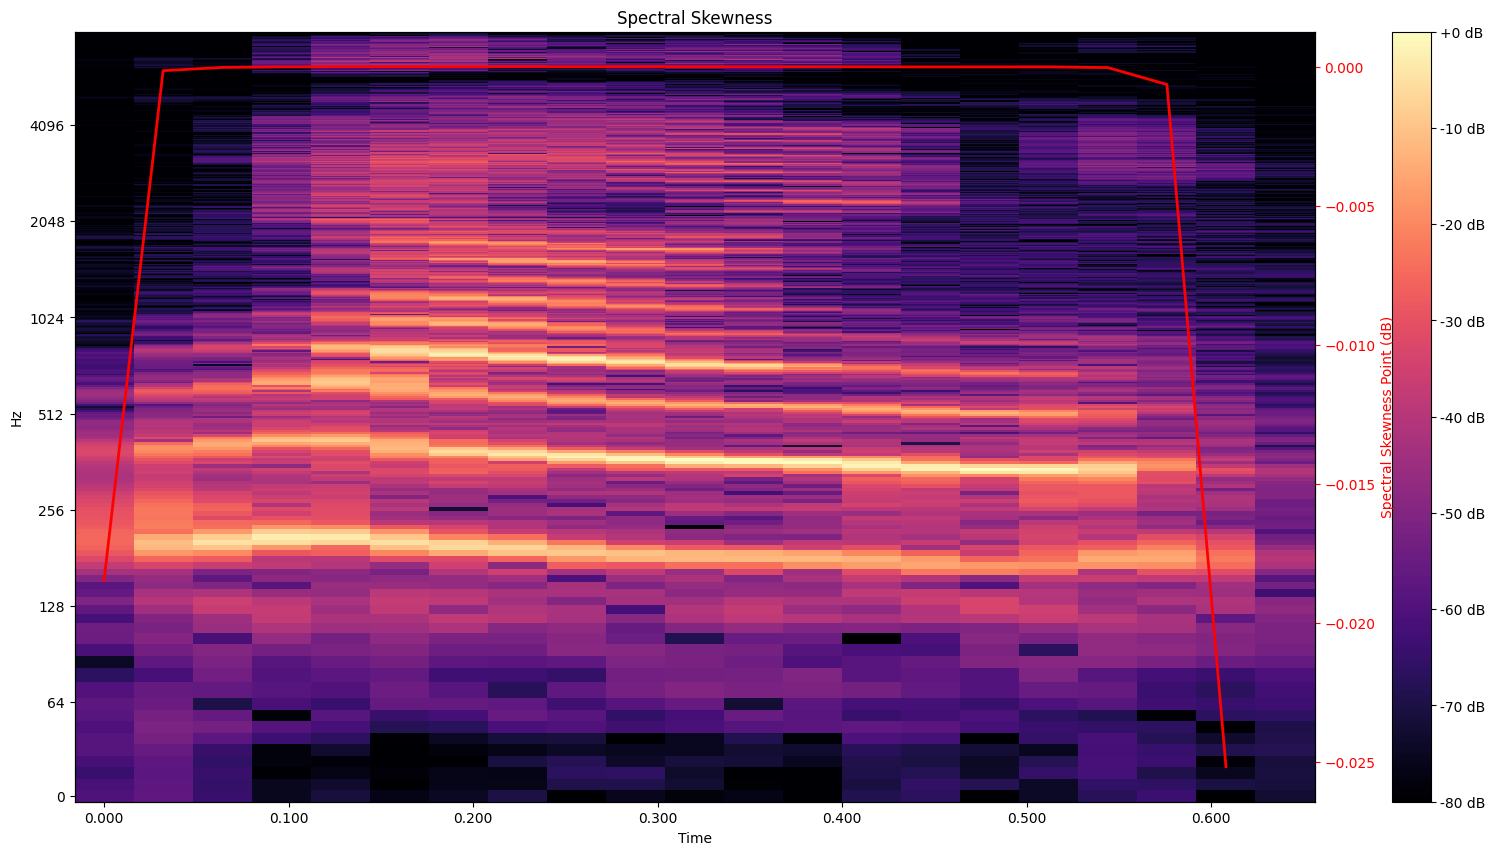

array([-4.95338639e+12, -3.83050418e+10, -6.81472338e+09, -1.71533620e+09,
       -5.35539619e+08, -2.09631201e+08, -1.30778103e+08, -1.61568472e+08,
       -1.49674548e+08, -2.50660400e+08, -3.38069074e+08, -5.02020955e+08,
       -8.99599151e+08, -1.27536553e+09, -2.07346676e+09, -2.08984164e+09,
       -2.18073798e+09, -8.58238959e+09, -1.71422871e+11, -6.74718888e+12,
       -2.33081088e+15])

In [7]:
spectral_skewness(audio_data, freq)

## Spectral Spread

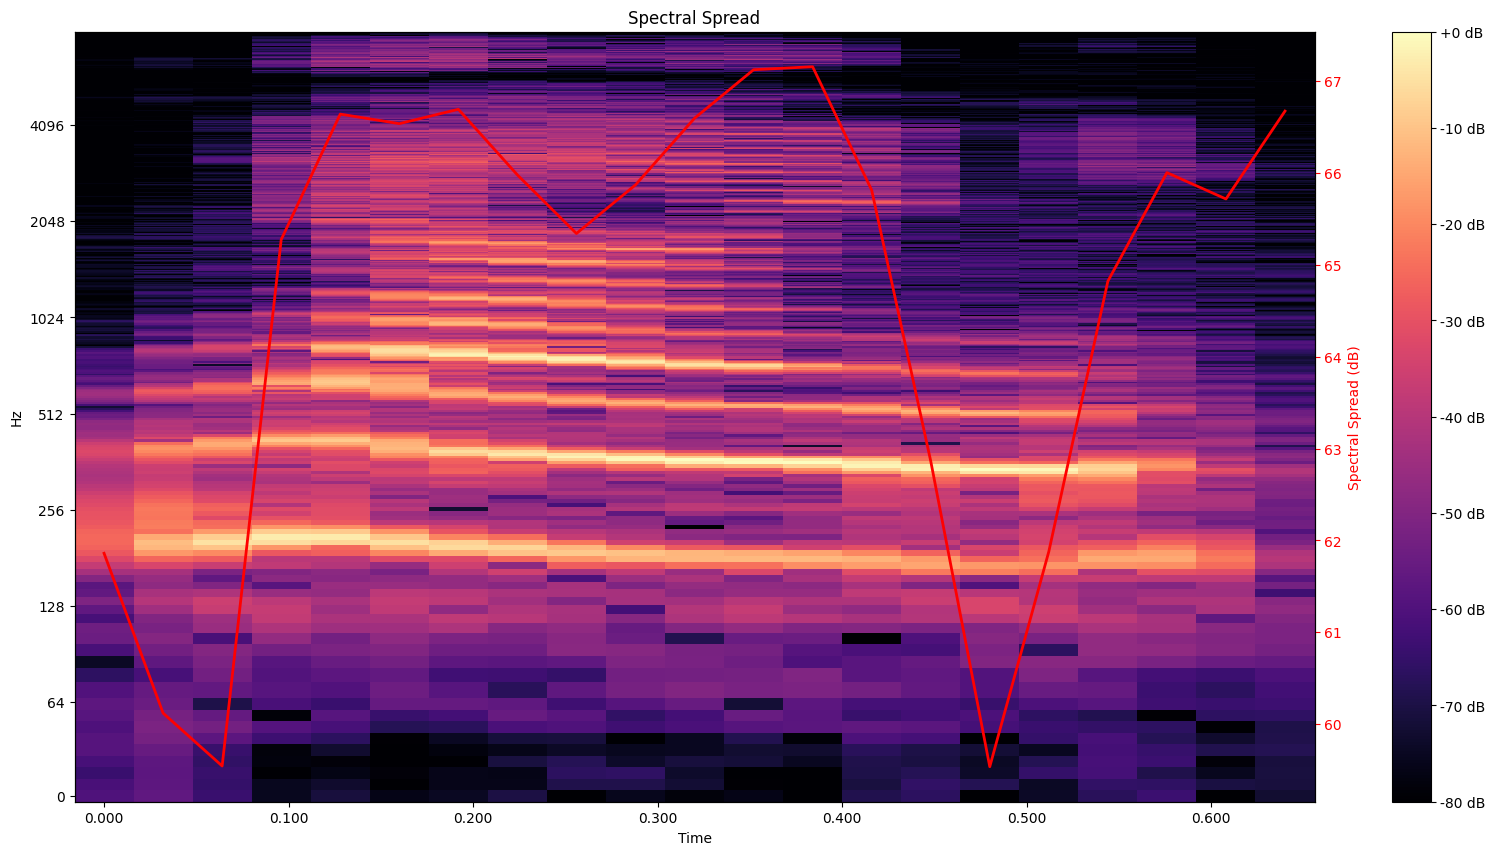

array([1238.80626684, 1013.95065291,  948.94146486, 1835.30756863,
       2147.91242577, 2122.3955939 , 2160.92683572, 1990.42240782,
       1849.46070488, 1965.6036469 , 2136.81773538, 2270.83883123,
       2279.35401871, 1952.80251135, 1390.6256963 ,  948.07473746,
       1241.49578435, 1742.15614625, 1996.0452053 , 1931.26369154,
       2156.07879801])

In [8]:
spectral_spread(audio_data, freq)

# Audio Features

In [9]:
features = calculate_audio_features(audio_data, freq, hop_length=hop_length)

print(features)
print(len(features))

[-2.10529210e+02  1.12637567e+02 -3.37969996e+00  2.46005493e+01
 -3.51957824e+01 -2.04329476e+01 -8.03673799e+00 -2.79575657e+01
  4.12351070e+00 -2.01790145e+01 -2.00891888e+01 -1.53709427e+01
 -1.52053667e+01  1.34112672e+04  1.19208865e+03  1.62860194e+03
  7.32526803e+02  3.00336013e+02  3.67113612e+02  1.46281500e+02
  1.13990658e+02  1.94600806e+02  3.94873130e+01  5.49781605e+01
  1.90961269e+01  6.38374019e+01 -4.43871678e+01  1.88470690e+02
  7.21761054e+01  6.73159646e+01  1.14512864e+01  1.83903621e+01
  8.22747256e+00 -1.49356406e+00  2.88523569e+01 -8.05332695e+00
 -6.07008024e+00 -6.62383485e+00 -1.77935935e-01 -4.29219502e+02
  6.46016482e+01 -6.30855640e+01 -2.20432773e+01 -5.62922419e+01
 -5.66578083e+01 -3.22782062e+01 -4.60082907e+01 -1.64070514e+01
 -3.29100571e+01 -3.52110754e+01 -2.33905677e+01 -2.98674234e+01
  1.93722639e+00 -2.41550371e+00 -2.04082123e+00  6.42270089e-01
 -4.10182065e-01  8.09508886e-02  1.02495111e+00 -4.84127676e-01
  2.67243605e-01  2.08030